# Problem Statement

## Many millons of teenage consumers using Social-networking site have attracted the attention of market as strugling to find edge in an increasingly competitive market.One way to gain this edge to identify segment of teenager so that client, can avoid targeting advertisement to teens with no intrest in the product being sold.
## Build K-mean clustring model to classify the intrest of teenagers by using various attributes 

In [87]:
import pandas as pd

In [88]:
df=pd.read_csv('snsdata.csv')

In [89]:
df.shape

(30000, 40)

In [90]:
df.isna().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [91]:
df.gender.value_counts()

F    22054
M     5222
Name: gender, dtype: int64

In [92]:
df.gender = df.gender.fillna('F')

In [93]:
df.age=df.age.fillna(df.age.mean())

In [94]:
df.isnull().sum()

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

In [95]:
df.gender.replace({'M':0,'F':1},inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        30000 non-null  int64  
 2   age           30000 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [97]:
from sklearn.cluster import KMeans

In [98]:
kmeans_sns=KMeans(n_clusters=3)

In [99]:
kmeans_sns.fit(df)
# Model has been created

KMeans(n_clusters=3)

In [100]:
kmeans_sns.labels_

array([0, 0, 1, ..., 0, 0, 0])

In [101]:
kmeans_sns.cluster_centers_

array([[2.00745392e+03, 8.08174359e-01, 1.80412788e+01, 1.08365128e+01,
        2.39442291e-01, 2.36371873e-01, 2.05869029e-01, 1.29158907e-01,
        1.24377108e-01, 1.23370413e-01, 9.32199124e-02, 9.70453516e-02,
        8.34549756e-02, 1.32783007e-01, 2.88719988e-01, 2.07479740e-01,
        1.32229325e-01, 1.14763175e-01, 9.71963558e-02, 3.85110988e-01,
        2.85498565e-01, 3.67443499e-02, 7.17622188e-01, 2.31690743e-01,
        4.21351991e-01, 2.13570242e-01, 9.77500378e-02, 2.03352293e-02,
        4.02778477e-01, 9.93607490e-02, 8.00322142e-02, 2.27361957e-01,
        3.11873962e-01, 1.40584890e-01, 5.61232194e-02, 4.14758142e-02,
        1.78637942e-01, 1.06206272e-01, 8.47133437e-02, 6.13076962e-02],
       [2.00757566e+03, 8.53039182e-01, 1.79293735e+01, 5.60417098e+01,
        3.12650810e-01, 2.82431346e-01, 2.57382512e-01, 2.19349650e-01,
        1.76605768e-01, 1.56612662e-01, 1.21797081e-01, 1.18235091e-01,
        9.50247041e-02, 1.56382856e-01, 3.76192118e-01, 2.10502

In [102]:
# To find the best value of K we plot the elbow plot

In [103]:
kmeans_sns.score(df)
# while building the plot ignore the minus sign(take mod)

-11294254.152967716

In [104]:
ssd=[]
for k in range(1,11):
    kmeans_sns=KMeans(n_clusters=k)
    kmeans_sns.fit(df)
    score=kmeans_sns.score(df)
    ssd.append(score)

In [105]:
ssd

[-42274974.92283437,
 -18611355.303126663,
 -11298600.067657592,
 -8109653.012615749,
 -6331420.107963124,
 -5066328.341704538,
 -3995876.038003647,
 -3111919.923432763,
 -2558849.393143448,
 -2217666.0554560646]

In [106]:
import numpy as np

In [107]:
ssd=np.abs(ssd)

In [108]:
ssd

array([42274974.92283437, 18611355.30312666, 11298600.06765759,
        8109653.01261575,  6331420.10796312,  5066328.34170454,
        3995876.03800365,  3111919.92343276,  2558849.39314345,
        2217666.05545606])

In [109]:
ssd=np.round(ssd)

In [110]:
import matplotlib.pyplot as plt

In [111]:
cluster_values=list(range(1,11))

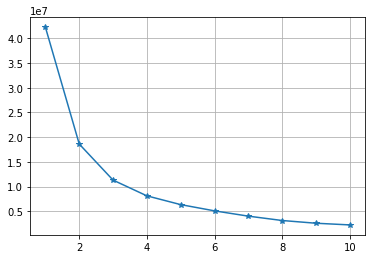

In [112]:
plt.plot(cluster_values,ssd,marker="*")
plt.grid()

In [113]:
 kmeans_sns=KMeans(n_clusters=5)

In [114]:
kmeans_sns.fit(df)

KMeans(n_clusters=5)

In [115]:
centroids=pd.DataFrame(kmeans_sns.cluster_centers_)

In [116]:
centroids.columns=df.columns

In [117]:
centroids

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007.438015,0.807040,18.091533,5.765806,0.223332,0.228763,0.192021,0.121086,0.109420,0.115924,...,0.080322,0.219578,0.297620,0.134898,0.054844,0.039826,0.178880,0.101509,0.084076,0.064097
1,2007.507785,0.824066,17.915396,32.981206,0.289257,0.267682,0.245440,0.170151,0.169484,0.149244,...,0.121886,0.265125,0.377891,0.157028,0.071842,0.049044,0.194395,0.127335,0.089969,0.057051
2,2007.679821,0.905436,17.693426,125.506329,0.381236,0.295607,0.240506,0.257632,0.196575,0.146687,...,0.135517,0.422934,0.483991,0.169769,0.131050,0.090097,0.205510,0.134773,0.116902,0.047655
3,2007.626498,0.864458,17.927201,68.258444,0.332098,0.285683,0.271083,0.244062,0.182611,0.158640,...,0.102419,0.314448,0.438222,0.168010,0.095010,0.077359,0.173458,0.122249,0.086729,0.059054
4,2007.701863,0.919255,17.750491,254.826087,0.322981,0.260870,0.279503,0.211180,0.223602,0.223602,...,0.136646,0.316770,0.571429,0.198758,0.124224,0.149068,0.217391,0.161491,0.130435,0.055901


In [118]:
df['Label']=kmeans_sns.labels_

In [119]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,Label
0,2006,0,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,1,18.801,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2006,0,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
3,2006,1,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,1,18.995,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0
